# Feature Selection

not clean,mistskes,human error,same data in features (duplicate feature),correletion,univarient selection kind of stasticaltest infogained,forward & backward selection 

All the libraries will be present inside sklearn.feature_selection library

In [4]:
import pandas as pd
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
#check duplicate columns assignment ex: filter wrapper methods etc...

### Univariate Selection

Most uefull Technique

We first divide the data set into dependent and independent feature and store in different dataset

we use library "feature_selection" from "SelectKBest"
K-value is the feature which we want

Chi2 is to plot/ apply statistical analysis this also checks hypothesis testing

In [5]:
X=df.iloc[:,:-1]
y=df['price_range']

In [8]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
# chi2 will be used for applying statistical analysis checks weather p_values <0.05 and order based on importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### Applying SelectKBest Algorithm

In [11]:
df.shape # 1 dependent and 20 independent features

# below "ordered_rank_features" is object creation of SelectKBest

(2000, 21)

In [12]:
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
#SelectKBest 1st attribute is score_func we give chi square and k value is fixed to 10
ordered_feature=ordered_rank_features.fit(X,y) # we are using fit() method for dependent and independent features

In [16]:
ordered_feature.scores_ #to see the output we give .scores_
#we convert this to dataframe

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [30]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])

In [19]:
X.columns # all the X columns are of type index we convert it to DataFrame

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [27]:
df_columns=pd.DataFrame(X.columns)
df_columns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [33]:
feature_rank=pd.concat([df_columns,df_scores],axis=1)
feature_rank.columns=['FeatureNames','Score']

In [39]:
feature_rank

FeatureNames   Score        
battery_power  14129.866576     1
three_g        0.327643         1
talk_time      13.236400        1
sc_w           16.480319        1
sc_h           9.614878         1
ram            931267.519053    1
px_width       9810.586750      1
px_height      17363.569536     1
pc             9.186054         1
n_cores        9.097556         1
mobile_wt      95.972863        1
m_dep          0.745820         1
int_memory     89.839124        1
four_g         1.521572         1
fc             10.135166        1
dual_sim       0.631011         1
clock_speed    0.648366         1
blue           0.723232         1
touch_screen   1.928429         1
wifi           0.422091         1
dtype: int64

In [41]:
# to get the top 10 or top n numbers we use .nlargest(n,"feature")
feature_rank.nlargest(10,'Score')

# by doing this we get the importance of the feature and we get an idea of what to drop

,FeatureNames,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance

This gives score for each feature of data 
higher the score more relavent it is

We use sklean.ensemble and "ExtraTreesClassifier"

In [42]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [43]:
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [45]:
print(model.feature_importances_) # we get the value of importance

[0.06130392 0.0198291  0.03301006 0.01997317 0.0315598  0.0171313
 0.03555123 0.03456432 0.03635245 0.03363864 0.03313621 0.04648575
 0.0487519  0.39417036 0.03366938 0.03440402 0.03395221 0.01394313
 0.0186279  0.01994517]


<AxesSubplot:>

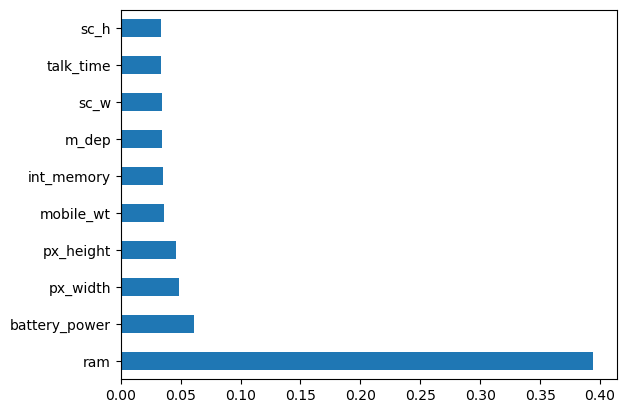

In [51]:
rank_feature=pd.Series(model.feature_importances_,index=X.columns)
rank_feature.nlargest(10).plot(kind='barh')

### Cor-relation or Pierson Cor-relation

if both the independent and dependent features are increasing it is +ve cor-relation

if both the independent and dependent features are decreasing it is -ve cor-relation

if both the features is opposite it is inverse relation

We use seaborn for the plotting of values 

We at last remove the most corelated value, 
if both the features is equally corelated we consider only one feature 

We only remove the corelated features w.r.t independent features

In [52]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<AxesSubplot:>

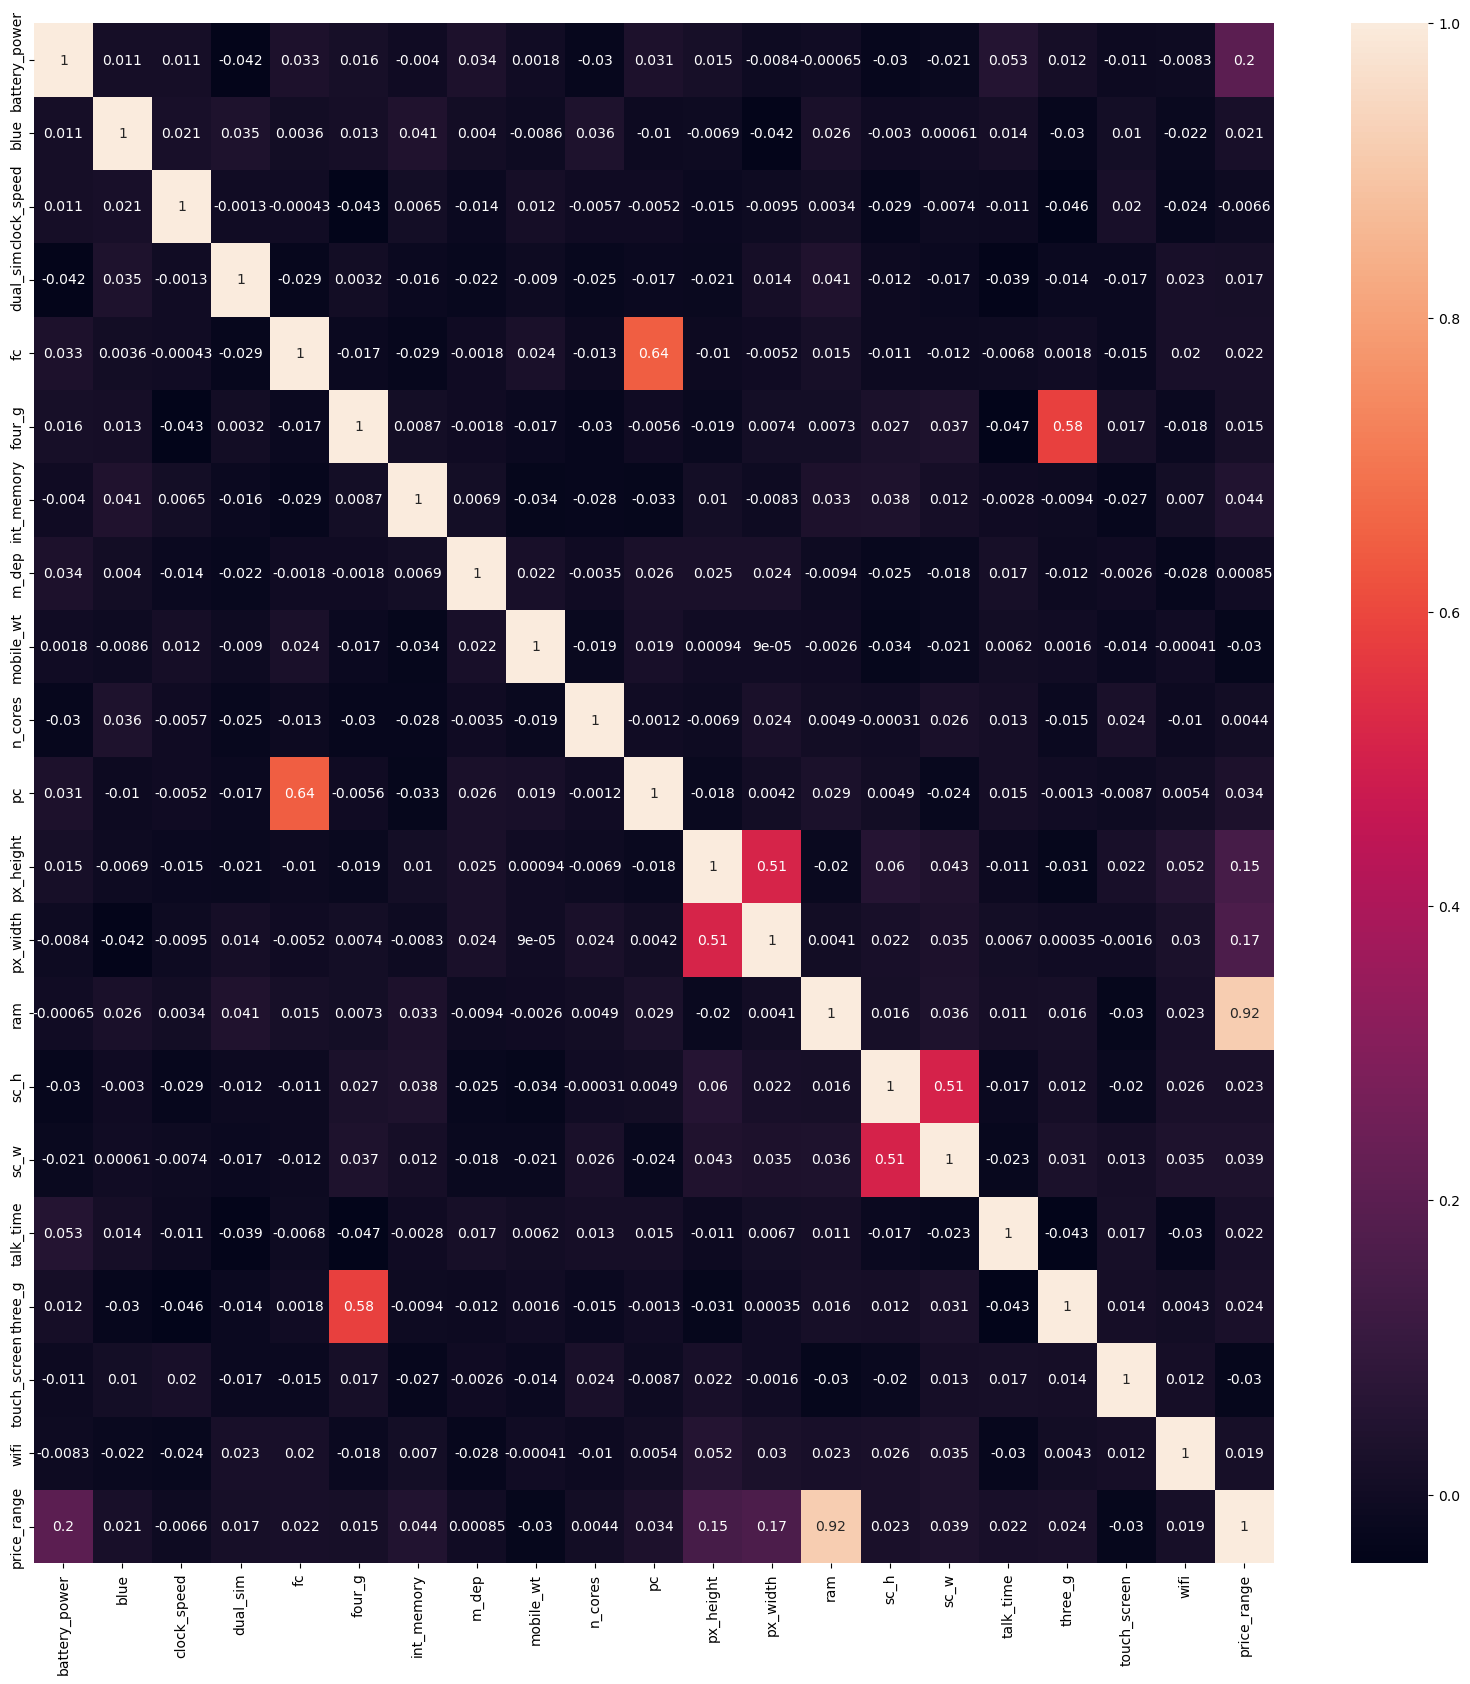

In [59]:
import seaborn as sns
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)  # annot=True give the values written on the heatmap

<AxesSubplot:>

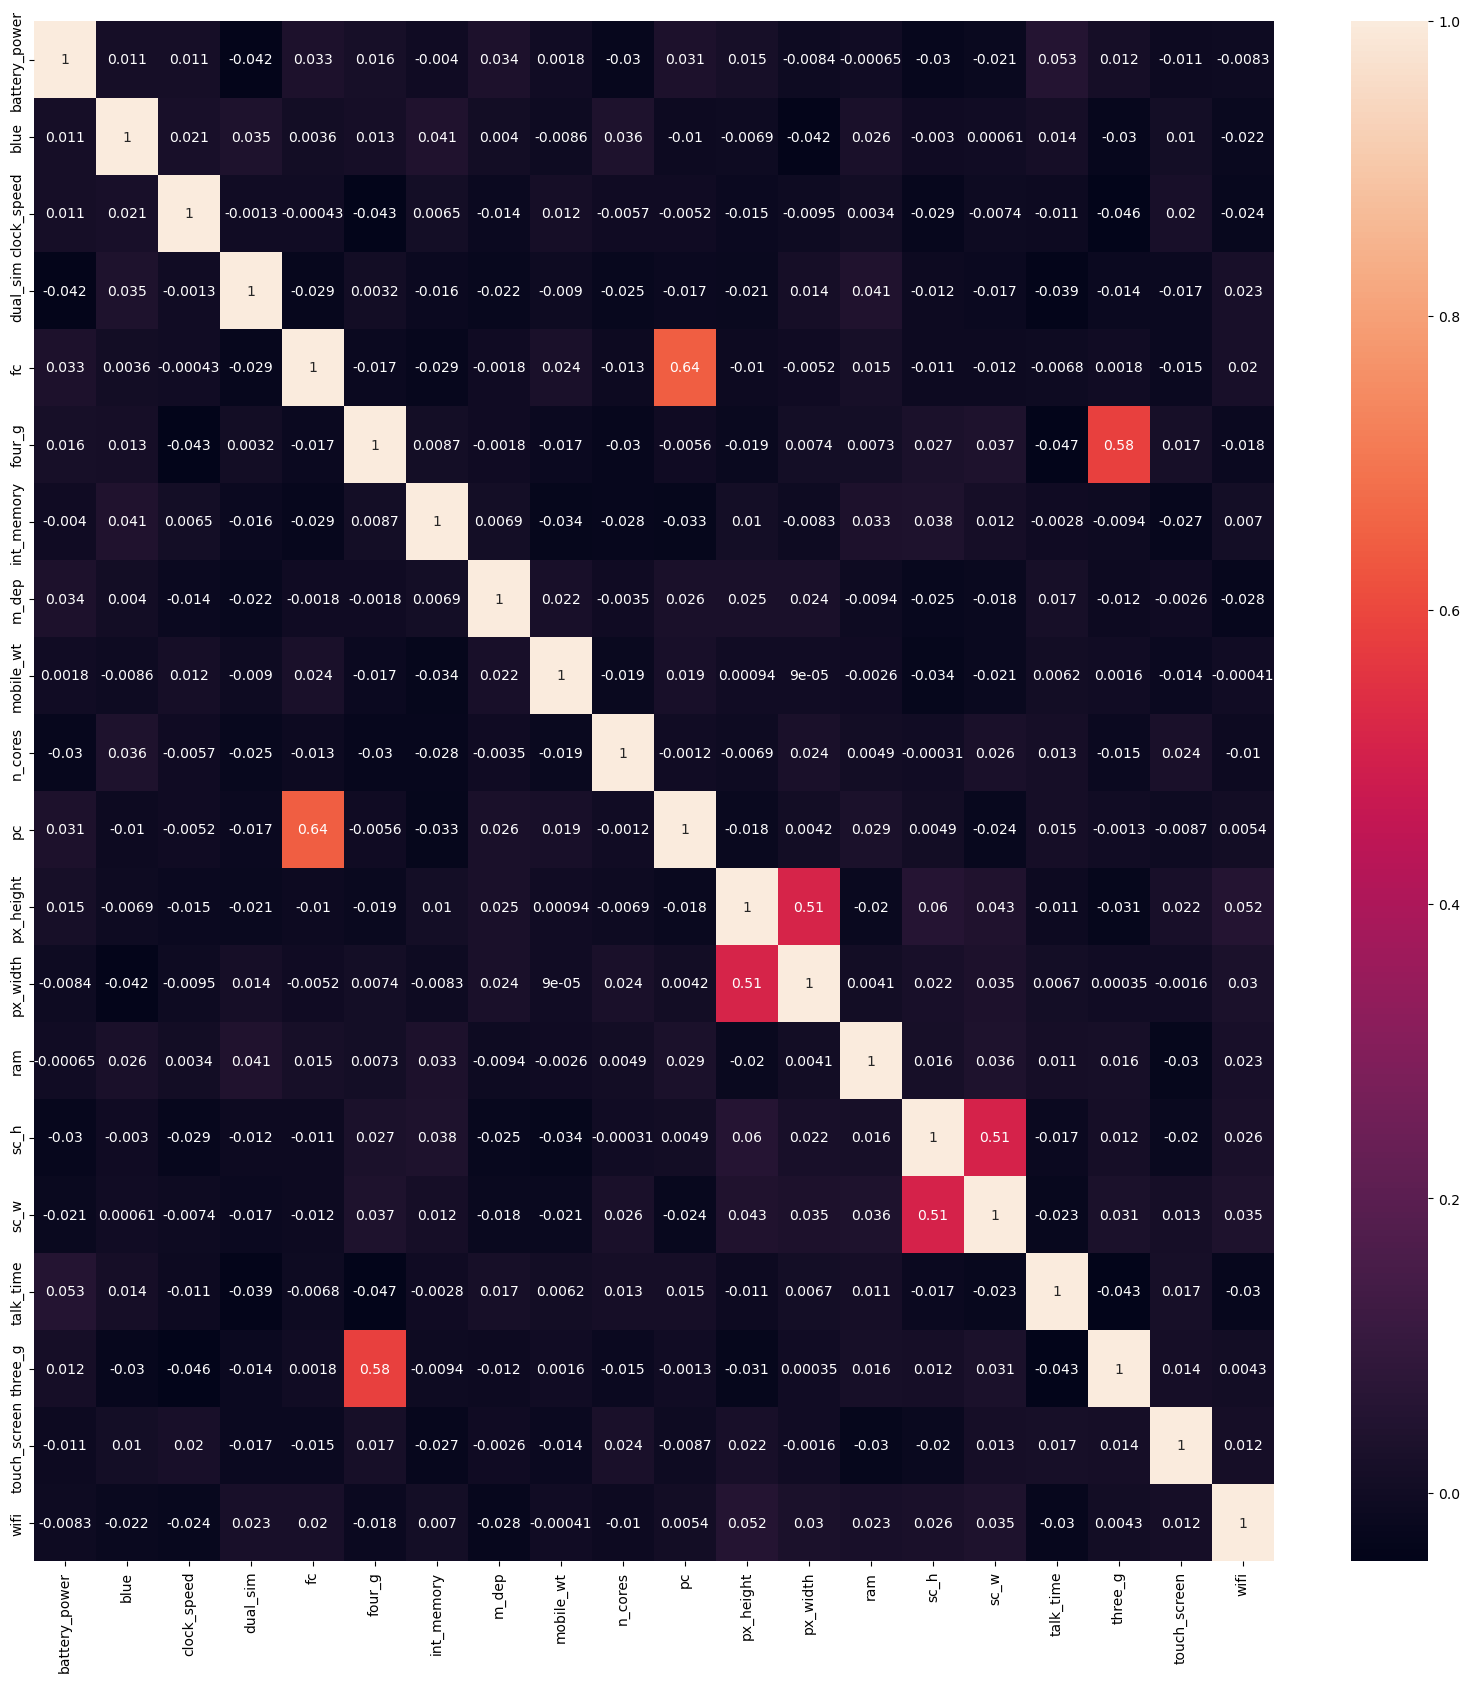

In [61]:
corr=df.iloc[:,:-1].corr() # skipping our last column as it is dependent feature
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

we remove the corelated features i.e 50% corellated

In [1]:
threshold=0.5  # threshold of the correlation is given by domain experties

In [65]:
#findinf and removing correlated feature
def correlation(dataset,threshold):
    col_corr = set() #Sets(it contains all unique values) all the names of correlated columns
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold: # we are intrested in absolute co=eff value
                colname = corr_matrix.columns[i]  #getting name of column
                col_corr.add(colname)
    return col_corr

# we can also keep the -ve ly correlated data as it can play an important role inversly(we only keep when both are opposite corelated)

In [66]:
correlation(df.iloc[:,:-1],threshold)
# we can use or drop these 3 features as they are correlated 

{'pc', 'px_width', 'sc_w', 'three_g'}

### Information Gain

This library lets us get highly corrrelated features
sklearn.feature_selection "mutual_info_classif"

non-negative value measuring dependency b/w variables it is eaqal to 0 if & only if 2 random variables are independent, and higher value=higher dependency 

In [2]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
mutual_info=mutual_info_classif(X,y)

In [11]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

# here if the values are 0 they are not correlated they are independent & the rest other than 0 is dependent
# We use dependent features

ram              0.849517
pc               0.038067
px_width         0.034378
battery_power    0.026713
px_height        0.025286
fc               0.024604
mobile_wt        0.009870
dual_sim         0.004210
sc_w             0.004174
touch_screen     0.000652
four_g           0.000000
int_memory       0.000000
m_dep            0.000000
n_cores          0.000000
blue             0.000000
clock_speed      0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
wifi             0.000000
dtype: float64